In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 19s 0us/step


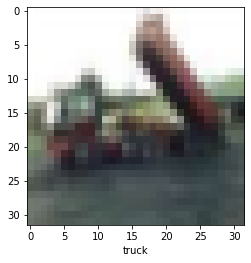

In [6]:
IMG_INDEX = 2

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [7]:
model = models.Sequential()

# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5474 - accuracy: 0.4351 - val_loss: 1.2838 - val_accuracy: 0.5382
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2059 - accuracy: 0.5722 - val_loss: 1.1376 - val_accuracy: 0.5941
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0580 - accuracy: 0.6260 - val_loss: 1.0614 - val_accuracy: 0.6276
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9602 - accuracy: 0.6638 - val_loss: 0.9392 - val_accuracy: 0.6707
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8858 - accuracy: 0.6890 - val_loss: 0.9238 - val_accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8303 - accuracy: 0.7110 - val_loss: 0.8715 - val_accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7830 - accuracy: 0.7254 - val_loss: 0.8782 -

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.8979 - accuracy: 0.6915
0.6915000081062317
